# Week 4 
## Case Study 6: Social Network Analysis
## Video 4.3.1: Introduction to Network Analysis

In this video, you will...

* Learn about the basic components of **networks** and the **graphs** that represent them
* Learn basic network concepts such as **neighbor**, **degree**, **path**, **component**, and **largest connected component**

Many systems of scientific and societal interest
consist of a large number of interacting components.
The structure of these systems can be represented
as networks where network nodes represent the components,
and network edges, the interactions between the components.
Network analysis can be used to study how pathogens, behaviors,
and information spread in social networks and much more.  
This case study first introduces some basic concepts about networks,
we'll then write a Python function to generate very simple random graphs,
and finally, we'll analyze some basic properties of social networks collected in different rural villages in India.  

Network refers to the real world object, such as a road
network, whereas a graph refers to its abstract mathematical representation.
It's useful to be aware of this distinction,

Graphs consist of nodes, also called vertices, and links, also called edges. Mathematically, a graph is a collection of vertices and edges
where each edge corresponds to a pair of vertices.
When we visualize graphs, we typically draw vertices as circles and edges as lines connecting the circles.

## Video 4.3.2: Basics of NetworkX  

In this video, you will...

* Learn how to use the NetworkX module to create and manipulate network graphs

**Important Note**

Most Python distributions available in 2018 include version 2.0 or higher of NetworkX. Version 2.0 of NetworkX introduced several significant changes. This version and higher versions behave differently from previous versions in certain areas.

For this video...

* No changes to the code are necessary. However, some of the data types of the returned objects have changed.
* Previously, G.nodes() returned a list object, while now it returns a NodeView object. (See 1:46 in the video.)
* Previously, G.edges() returned a list object, while now it returns an EdgeView object. (See 3:35 in the video.)

In [1]:
#Import:
import networkx as nx

In [2]:
# crate empty graph G
G = nx.Graph()

# NODES:

# Add new node to a graph:
G.add_node(1)

# Add many nodes to a graph:
G.add_nodes_from([2,3]) # input argument has to be a list containing all of the nodes.

# Add many nodes to a graph:
G.add_nodes_from(['u', 'v']) # it is possible to add nodes as a strings.

#If we would like to know what are the nodes in our graph, we can use the nodes method.
G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [3]:
# EDGE:

# Add edge conecting 1, 2
G.add_edge(1,2)

# Add edge conecting u, v
G.add_edge('u', 'v')
           
# Add multiple egdes:
# The input argument is going to be a list, which consists of several tuples, each tuple corresponding to an edge.
# Note if nodes do not exist when edge is created. whay will be automaticly added.
G.add_edges_from([(1,3),(1,4),(1,5),(1,6)]) 

# Add edge conecting u, w
G.add_edge('u', 'w')

# print all the edges:
G.edges()
           

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

In [4]:
# REMOVE NODES:

# remove one node:
G.remove_node(2)

# remove multiple nodes:
G.remove_nodes_from([4,5])

G.nodes()

NodeView((1, 3, 'u', 'v', 6, 'w'))

In [5]:
# REMOVE EDGES:

# remove one edge:
G.remove_edge(1,3)

# remove multiple edges:
G.remove_nodes_from([(1,2),('u','v')])

G.edges()

EdgeView([(1, 6), ('u', 'v'), ('u', 'w')])

In [6]:
# Number of nodes:
G.number_of_nodes()

6

In [7]:
# Number of edges:
G.number_of_edges()

3

## Video 4.3.3: Graph Visualization

In this video, you will...

* Learn how to use networkx to visualize a graph

**Important Note**

Most Python distributions available in 2018 include version 2.0 or higher of NetworkX. Version 2.0 of NetworkX introduced several significant changes. This version and higher versions behave differently from previous versions in certain areas.

For this video...

* Previously, G.degree() returned a Python dictionary, while now it returns a DegreeView object, which is similar to a dictionary. (See 2:23-4:03 in the video.) No code changes are necessary.

**Networkx** contains many types of random graph generators.
But in addition, it also contains a few empirical data sets.
Let's use one of them called the karate club graph.
In this network, the nodes represent members of a karate club and the edges
correspond to friendships between the members.
We can extract the karate club data by typing karate club graph
and we can assign that network to object G. Networkx is not really

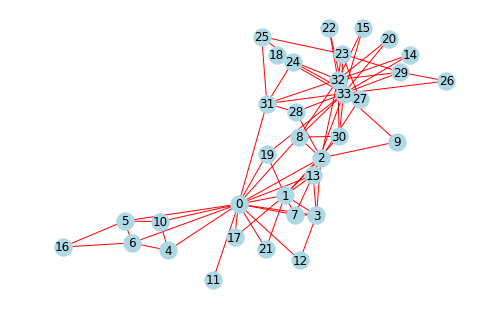

In [12]:
# Import:
import networkx as nx
import matplotlib.pyplot as plt

# create graph G usiing karate_club... network
G = nx.karate_club_graph() 

# draw figure of the network:
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='red')

# save figure:
plt.savefig('res/img/karate_graph_network.png')


In [9]:
# Networkx stores the degrees of nodes in a dictionary where
# the keys are node IDs and the values are their associated degrees.

G.degree()

# example: node nr 0 has 16, 6 has 4 etc.
# We can use this dictionary to find the degree of a given node.

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [10]:
# Get the value for the key = 33

G.degree()[33] # v1 - look up the dictionary

G.degree(33) # v2  - call the function in the class

# same output

17

## Video 4.3.4: Random Graphs

The simplest possible random graph model is the so-called Erdos-Renyi,
also known as the ER graph model.
This family of random graphs has two parameters, capital N - number of nodes and lowercase p - probability for any pair of nodes to be connected by an edge.
Although the NetworkX library includes an Erdos-Renyi graph generator,
we'll be writing our own ER function to better understand the model.

Let's first see how to implement the coin flip just one time.
To do this, we'll be using the SciPy stats module, more specifically
a function called **Bernoulli**.
We'll be using the **rvs** method to generate one single realization
in this case of a Bernoulli random variable.
The only input argument is p, which is the probability of success.
In this case, the outcomes are coded as 0s and 1s.

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

bernoulli.rvs(p=0.2)

0

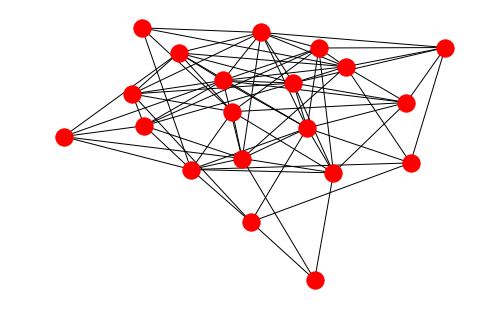

In [24]:
# Pseudo code
N = 20
p = 0.2

# create empty graph
# add all N nodes to the graph
# loop over all pairs of nodes:
    #add an edge with prob p
    
G = nx.Graph()
G.add_nodes_from(range(N))

for node1 in G.nodes():
    for node2 in G.nodes():
        if bernoulli.rvs(p=p):
            G.add_edge(node1, node2)
        
G.number_of_nodes()
nx.draw(G)



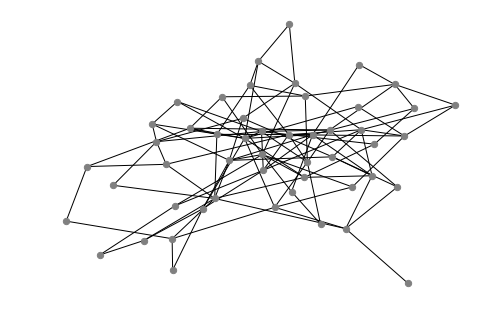

In [37]:
#Consider each pair of nodes just one time.
# CORECT IMPLEMENTATION OF ERDOS-RENYI

N = 50
p = 0.08    
def er_graph(N,p):
    """generate an ER graph"""
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1, node2)
    return(G)

G = er_graph(N,p)
nx.draw(G, node_size=40, node_color='gray')
plt.savefig('res/img/er1.png')

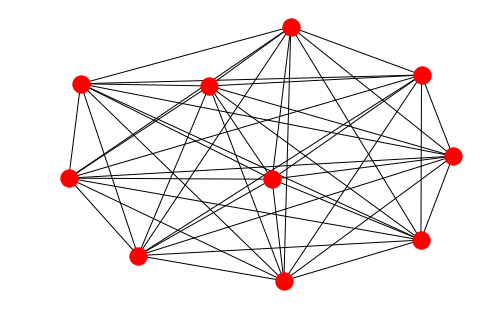

In [55]:
graph = nx.erdos_renyi_graph(10,1)
nx.draw(graph)


## Video 4.3.5: Plotting the Degree Distribution

Let's implement plot the degree distribution function.

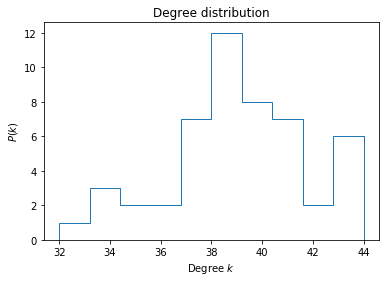

In [58]:
def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel('Degree $k$')
    plt.ylabel('$P(k)$')
    plt.title('Degree distribution')
    
g = er_graph(50,0.8)
plot_degree_distribution(g)
plt.savefig('res/img/distribution_hist.png')

## Video 4.3.6: Descriptive Statistics of Empirical Social Networks

In this task, we will look at basic properties of the social networks
from two different villages in rural India.
These data are part of a much larger dataset that was collected
to study diffusion of micro-finance.  
The structure of connections in a network
can be captured in what is known as the **Adjacency matrix** of the network.  
We will first read in the network of adjacency matrices
and construct the networks.
Here, **np.loadtxt** is used to read in the CSV files, the adjacency matrices.

In [62]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

A1 = np.loadtxt('res/data/adj_allVillageRelationships_vilno_1.csv', delimiter=',')
A2 = np.loadtxt('res/data/adj_allVillageRelationships_vilno_2.csv', delimiter=',')

G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)


To get a basic sense of the network size and number of connections,
let's count the number of nodes and the number of edges in the networks.
In addition, each node has a total number of edges, its degree.
Let's also calculate the mean degree for all nodes in the network.

In [70]:
def basic_net_stats(G):
    print("Number of nodes: %.2f" % G.number_of_nodes())
    print("Number of edges: %.2f" % G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))

In [71]:
# basic ingo about the networks:
basic_net_stats(G1)
print('\n')
basic_net_stats(G2)

Number of nodes: 843.00
Number of edges: 3405.00
Average degree: 8.08


Number of nodes: 877.00
Number of edges: 3063.00
Average degree: 6.99


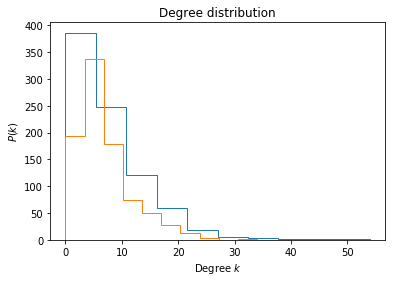

In [69]:
# Plot the Graps:
plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.savefig('res/img/IndiaNetwork.png')

## Video 4.3.7: Finding the Largest Connected Component

In most networks, nodes are connected to each other
as part of a single connected component. Let's now find out how large are the largest connected components  
We can extract all components for graph using the function **nx.connected_components_subgraphs()**

In [78]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

gen = nx.connected_component_subgraphs(G1)
g = gen.__next__()
print(type(g))
print(g.number_of_nodes())

<class 'networkx.classes.graph.Graph'>
825


In [79]:
len(G1)

843

In [83]:
# Get largest component from the graph:

G1_LCC = max(nx.connected_component_subgraphs(G1), key=len)
G2_LCC = max(nx.connected_component_subgraphs(G2), key=len)

print(G1_LCC.number_of_nodes())
print(G2_LCC.number_of_nodes())

825
810


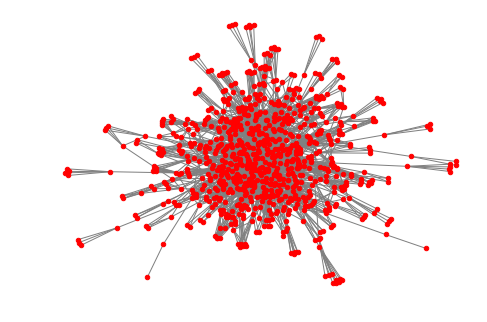

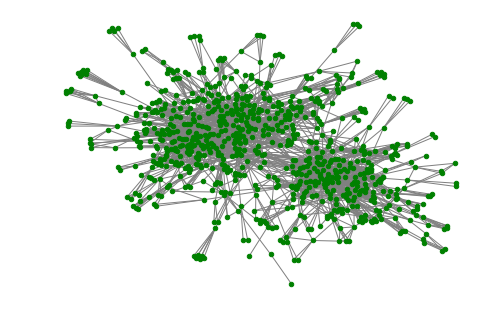

In [87]:
# visualise the graphs:

plt.figure()
nx.draw(G1_LCC, node_color='red', edge_color='gray', node_size=20)
plt.savefig('res/img/Village1.png')

plt.figure()
nx.draw(G2_LCC, node_color='green', edge_color='gray', node_size=20)
plt.savefig('res/img/Village2.png')